In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

%matplotlib inline

In [4]:
modelos = ["LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier", "XGBoostClassifier", "MLPClassifier"]
mod = ["LogReg", "DTC", "RFC", "XGB","MLP"]

folder = "Resultados_PrediccionClusterSospechoso"

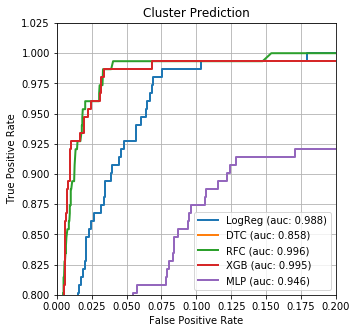

In [9]:
plt.figure(figsize=(5,5))

leg = []


for m in range(len(modelos)):
    scorefile = './'+folder+'/scores'+modelos[m]+'_'+'.csv'
    df = pd.read_csv(scorefile, sep = ";", header = None)

    df[4] = df[3].apply(lambda x: x.split("[")[1].split("]")[0].split(","))
    df[6] = df[4].apply(lambda x: float(x[1]))

    fpr, tpr, thr = roc_curve(df[2], df[6])

    autc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth = 2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    leg.append(mod[m]+" (auc: "+"%.3f"%(autc)+")")

plt.legend(leg, loc="lower right")
plt.plot([0, 1], [0, 1], color='k', linestyle='--', linewidth = 2)
plt.grid(True)
plt.title("Cluster Prediction")
    
axes = plt.gca()
axes.set_xlim([0,0.2])
axes.set_ylim([.8,1.025])

plt.savefig('./'+folder+'/roc_curves_zoom.eps', format='eps', dpi=1000)

In [6]:
def DETCurve(fps,tpr, ax=None):
    from matplotlib import pyplot as plt
    import matplotlib

    """
    Given false positive and false negative rates, produce a DET Curve.
    The false positive rate is assumed to be increasing while the false
    negative rate is assumed to be decreasing.
    """
    if ax == None:
        ax = plt.axes()
    
    fps = [x*100 for x in fpr]
    fns = [x*100 for x in 1-tpr]
    plt.plot(fps,fns, linewidth = 2)
    plt.yscale('log')
    plt.xscale('log')
    ticks_to_use = [0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50]
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(ticks_to_use)
    ax.set_yticks(ticks_to_use)
    plt.axis([0.001,50,0.001,50])
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("False Negative Rate")
    